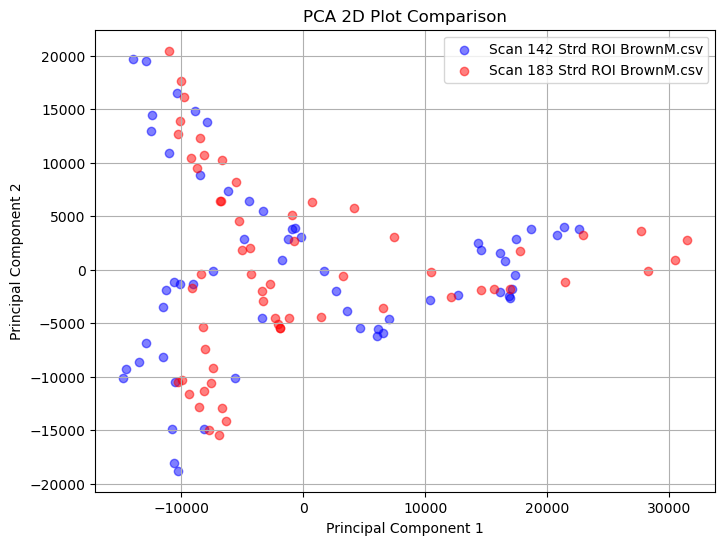

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Specify the file names you want to compare
file1 = 'Scan 142 Strd ROI BrownM.csv'
file2 = 'Scan 183 Strd ROI BrownM.csv'

# Load the 3D data from the first .csv file into a pandas DataFrame
data_1 = pd.read_csv(file1)

# Load the 3D data from the second .csv file into a pandas DataFrame
data_2 = pd.read_csv(file2)

# Perform PCA on the first 3D data
pca_1 = PCA(n_components=2)
data_pca_1 = pca_1.fit_transform(data_1)

# Perform PCA on the second 3D data
pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_2)

# Create a scatter plot overlaying the two PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_1[:, 0], data_pca_1[:, 1], c='b', label=f'{file1}', alpha=0.5)
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], c='r', label=f'{file2}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Plot Comparison')
plt.legend()
plt.grid(True)
plt.show()

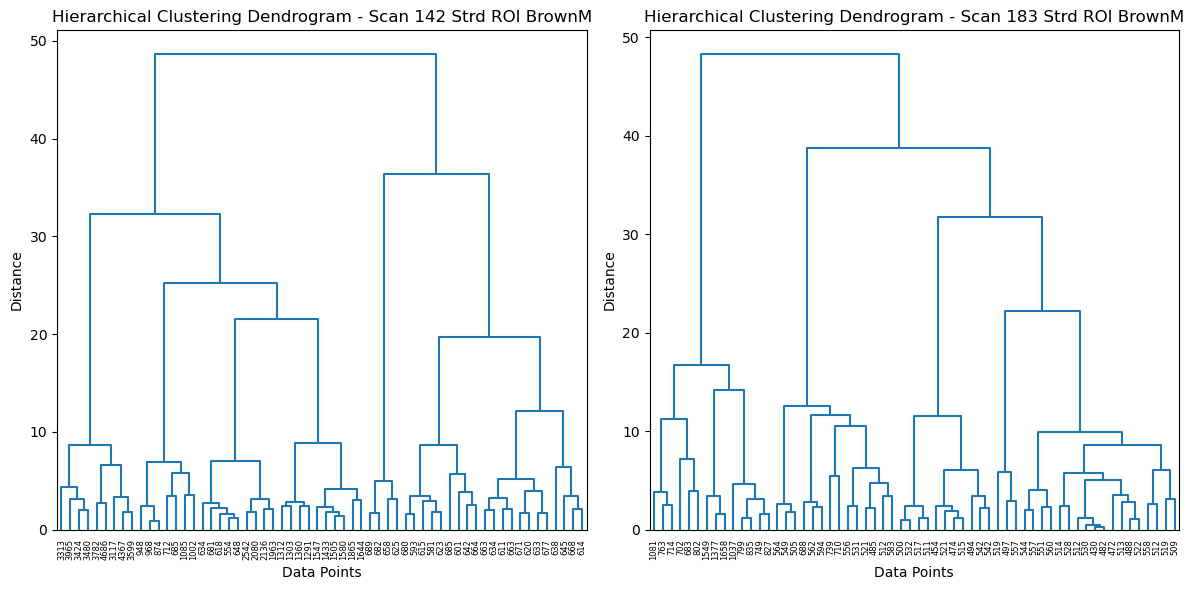

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Load the data from the first CSV file into a pandas DataFrame
data_1 = pd.read_csv('Scan 142 Strd ROI BrownM.csv', index_col=0)

# Load the data from the second CSV file into a pandas DataFrame
data_2 = pd.read_csv('Scan 183 Strd ROI BrownM.csv', index_col=0)

# Standardize the data for both files
scaler = StandardScaler()
data_standardized_1 = scaler.fit_transform(data_1)
data_standardized_2 = scaler.fit_transform(data_2)

# Perform hierarchical clustering for both files
linkage_matrix_1 = hierarchy.linkage(data_standardized_1, method='ward')
linkage_matrix_2 = hierarchy.linkage(data_standardized_2, method='ward')

# Create side-by-side dendrogram plots for comparison
plt.figure(figsize=(12, 6))

# Subplot 1: Dendrogram for the first file
plt.subplot(1, 2, 1)
dendrogram_1 = hierarchy.dendrogram(linkage_matrix_1, labels=data_1.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 142 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

# Subplot 2: Dendrogram for the second file
plt.subplot(1, 2, 2)
dendrogram_2 = hierarchy.dendrogram(linkage_matrix_2, labels=data_2.index, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram - Scan 183 Strd ROI BrownM')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



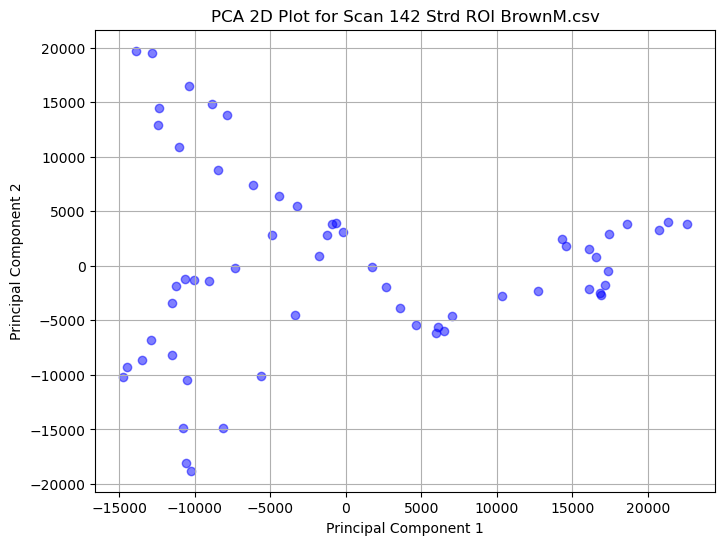

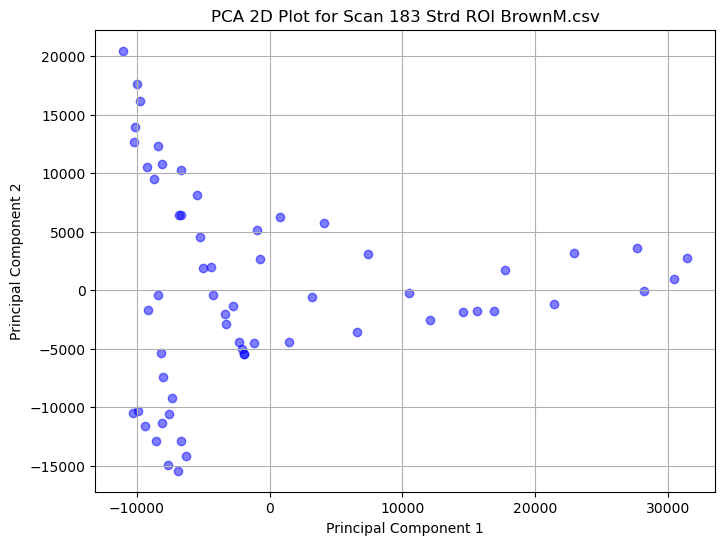

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob

# Get a list of all .csv files starting with 'Scan'
csv_files = glob.glob('Scan*.csv')

# Loop through each .csv file
for file in csv_files:
    # Load the 3D data from the .csv file into a pandas DataFrame
    data = pd.read_csv(file)
    
    # Perform PCA on the 3D data
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    
    # Create a 2D scatter plot for each file
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c='b', alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA 2D Plot for {file}')
    plt.grid(True)
    plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scan 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scan 183 Strd ROI BrownM.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'red', -1: 'blue'}

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    colors = [color_map[label] for label in labels]

    # Using plotly for interactive plotting
    fig = go.Figure(data=[go.Scatter3d(x=X_flat, y=Y_flat, z=Z_flat, mode='markers', marker=dict(size=3, color=colors))])
    
    fig.update_layout(title=f'SVM Clustering - {file_name}', margin=dict(l=0, r=0, b=0, t=40))
    fig.show()


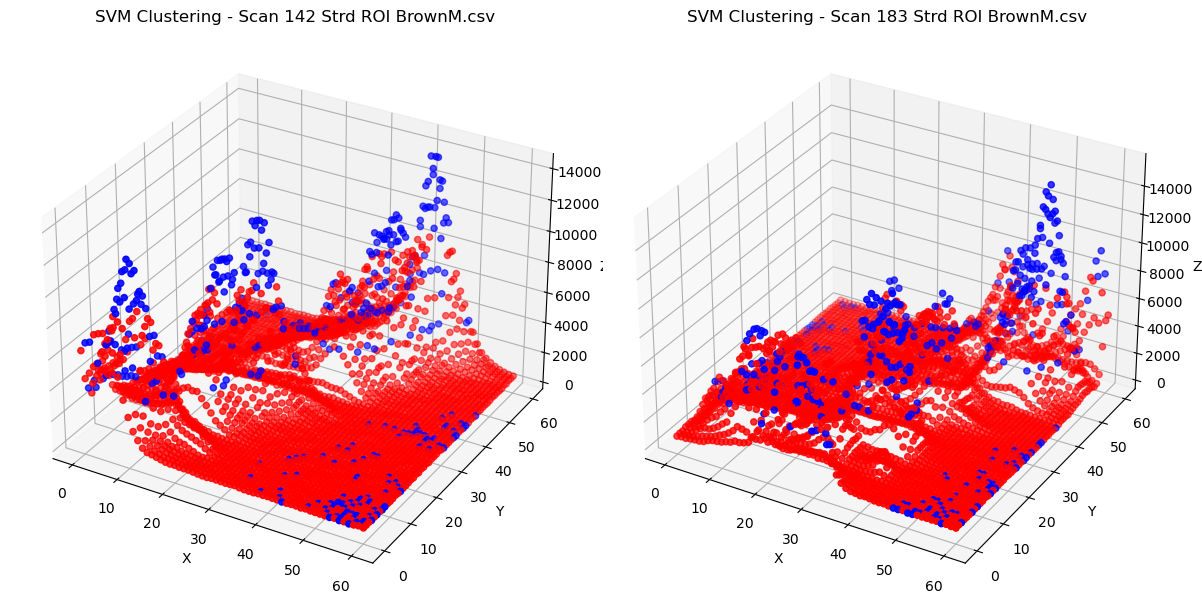

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

file1_name = 'Scan 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scan 183 Strd ROI BrownM.csv'  # Example name, replace with your file name

file_list = [file1_name, file2_name]

color_map = {1: 'r', -1: 'b'}

fig = plt.figure(figsize=(12, 6))  # Adjust figure size as per your requirements

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')

    X = matrix.flatten().reshape(-1, 1)

    clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
    clf.fit(X)

    labels = clf.predict(X)

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)

    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    ax = fig.add_subplot(1, 2, index + 1, projection='3d')  # This will create two side-by-side 3D plots
    ax.scatter(X_flat, Y_flat, Z_flat, c=[color_map[label] for label in labels])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'SVM Clustering - {file_name}')

plt.tight_layout()
plt.show()

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.



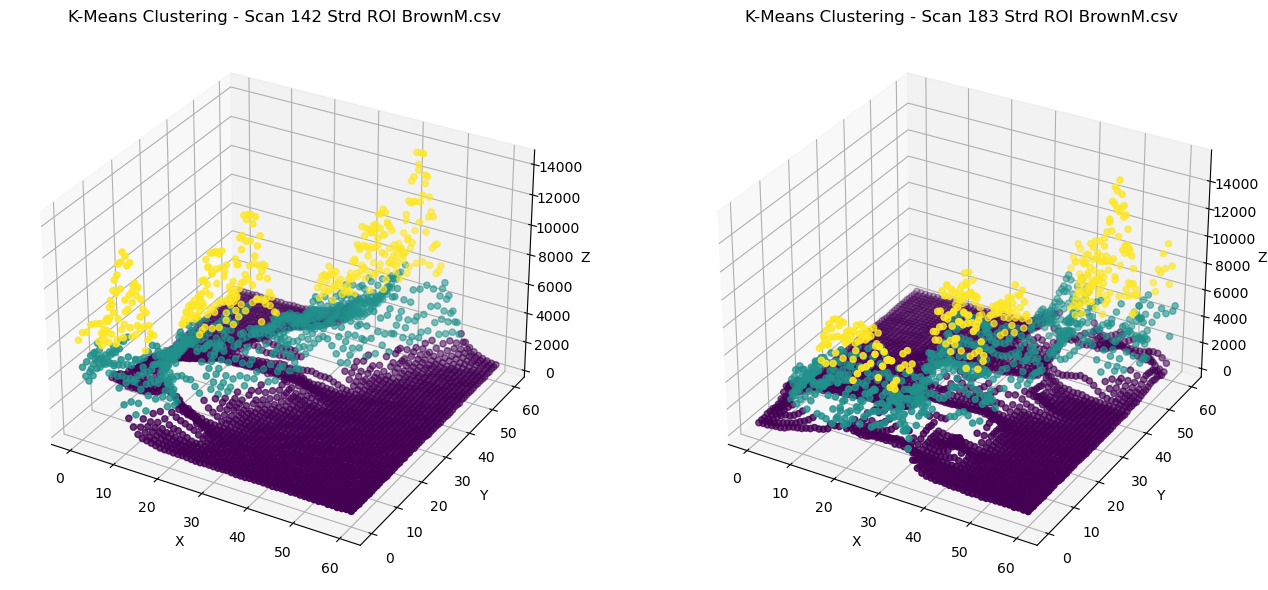

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file1_name = 'Scan 142 Strd ROI BrownM.csv'  # Example name, replace with your file name
file2_name = 'Scan 183 Strd ROI BrownM.csv'  # Replace with your specific file name

file_list = [file1_name, file2_name]

# Create a single figure and specify its size
fig = plt.figure(figsize=(14, 6))

for index, file_name in enumerate(file_list):
    matrix = np.genfromtxt(file_name, delimiter=',')
    X = matrix.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    x = np.arange(0, matrix.shape[1])
    y = np.arange(0, matrix.shape[0])
    X_grid, Y_grid = np.meshgrid(x, y)
    X_flat = X_grid.flatten()
    Y_flat = Y_grid.flatten()
    Z_flat = matrix.flatten()

    # Adjust the position of the subplot for each file
    ax = fig.add_subplot(1, 2, index+1, projection='3d')
    ax.scatter(X_flat, Y_flat, Z_flat, c=labels, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'K-Means Clustering - {file_name}')

plt.tight_layout()
plt.show()
